### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ
#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 
## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ №6
#### Дисциплина: Анализ данных
##### Студент:   Леонова Алина
##### Группа:    НФИбд-02-17
### Москва 2020
***

# Линейная модель множественной регрессии

In [1]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [2]:
data = pd.read_csv('task.csv')
N = len(data)
data

,x1,x2,x3,y
0,-50.961693,34.222705,82.769919,427.710821
1,1.132351,13.906638,24.714842,-46.250190
2,-87.849353,25.608321,70.985941,1031.101058
3,-30.200684,9.436669,118.259251,621.485275
4,-78.989576,1.964400,30.031038,1417.537673
...,...,...,...,...
95,-40.534847,33.365644,47.278910,1170.520984
96,0.679257,1.641914,69.817091,650.488746
97,-88.531342,25.693118,117.454340,1348.721088
98,-56.334241,4.382330,24.057683,1271.574189


In [3]:
X = data.drop('y', axis=1)
y = data['y']
print( X, '\n\n\t y\n', y)

           x1         x2          x3
0  -50.961693  34.222705   82.769919
1    1.132351  13.906638   24.714842
2  -87.849353  25.608321   70.985941
3  -30.200684   9.436669  118.259251
4  -78.989576   1.964400   30.031038
..        ...        ...         ...
95 -40.534847  33.365644   47.278910
96   0.679257   1.641914   69.817091
97 -88.531342  25.693118  117.454340
98 -56.334241   4.382330   24.057683
99   7.141335  20.360926   78.324660

[100 rows x 3 columns] 

	 y
 0      427.710821
1      -46.250190
2     1031.101058
3      621.485275
4     1417.537673
         ...     
95    1170.520984
96     650.488746
97    1348.721088
98    1271.574189
99    -453.531134
Name: y, Length: 100, dtype: float64


**Графики совместных распределений предикторов и целевой переменной**

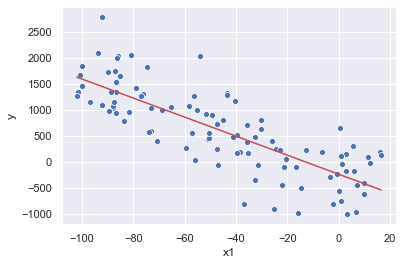

In [4]:
x1 = data.drop(['y','x2','x3'], axis=1)
y = data.drop(['x3','x1','x2'], axis=1)

sns.scatterplot(x1['x1'],y['y'])

m1 = LinearRegression()
m1.fit(x1, y)

minimax1 = np.array([x1.min(), x1.max()])
plt.plot(minimax1, m1.predict(minimax1.reshape(-1, 1)), 'r-')
plt.show()


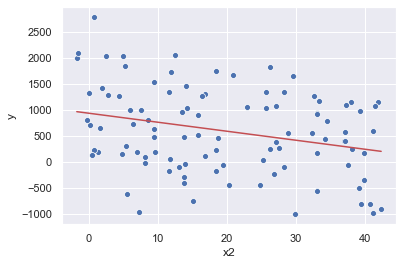

In [5]:
x2 = data.drop(['y','x1','x3'], axis=1)

sns.scatterplot(x2['x2'],y['y'])

m2 = LinearRegression()
m2.fit(x2, y)

minimax2 = np.array([x2.min(), x2.max()])
plt.plot(minimax2, m2.predict(minimax2.reshape(-1, 1)), 'r-')
plt.show()

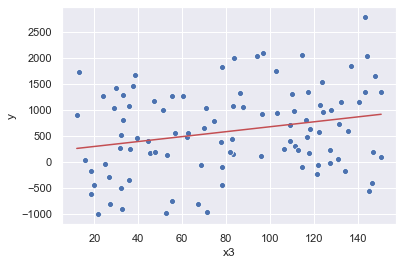

In [6]:
x3 = data.drop(['y','x1','x2'], axis=1)

sns.scatterplot(x3['x3'],y['y'])

m3 = LinearRegression()
m3.fit(x3, y)

minimax3 = np.array([x3.min(), x3.max()])
plt.plot(minimax3, m3.predict(minimax3.reshape(-1, 1)), 'r-')
plt.show()

## Вычисление коэффициентов методом наименьших квадратов

**Регрессионная матрица**

In [7]:
x0 = np.ones((1, 100))
x1 = data['x1'].to_numpy()
x2 = data['x2'].to_numpy()
x3 = data['x3'].to_numpy()
y = data['y'].to_numpy()
H = np.vstack([x0, x1, x2, x3]).T 

In [8]:
W = np.matmul(H.T, H)
W1 = np.linalg.inv(W)

**Коэффициенты модели**

In [9]:
k = np.matmul(W1, H.T)
k = np.matmul(k, y)
k

array([ 39.95095793, -19.64192606, -25.63056156,   1.97854411])

**Проверка коэффициентов**

In [10]:
m = LinearRegression()
m.fit(X, y)

m.intercept_, m.coef_

(39.95095793205337, array([-19.64192606, -25.63056156,   1.97854411]))

**Уравнение построенной линейной модели:**

$$y = 39.95095793 - 19.64192606 x_1 - 25.63056156 x_2 + 1.97854411 x_3$$

**График распределения остатков модели**

In [11]:
y_emp = k[0] + k[1] * x1 + k[2] * x2 + k[3] * x3
dy = y - y_emp

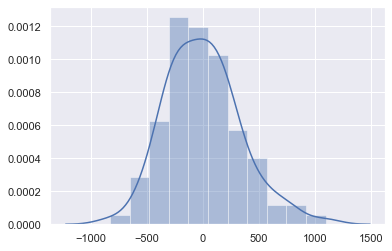

In [12]:
sns.distplot(dy)

**Проверка нормальности распределения остатков критерием Шапиро-Уилка(с формулировкой вывода на основе критерия)**

In [13]:
print(stats.shapiro(dy))

(0.9815564155578613, 0.17543518543243408)


p-значение>0.05 => распределения нормальные

**Проверка отсутствия систематической ошибки критерием Стьюдента**

In [14]:
stats.ttest_1samp(dy, 0)

Ttest_1sampResult(statistic=7.700721913909007e-15, pvalue=0.9999999999999939)

p-значение>(1-0.05) => коэффициент Спирмана равен 0, систематической ошибки нет

**Графики совместных распределений предикторов и эмпирических значений целевой переменной против остатков**

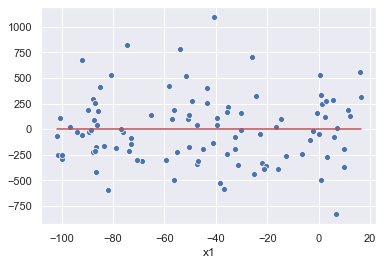

In [15]:
x1 = data.drop(['y','x2','x3'], axis=1)
sns.scatterplot(x1['x1'],dy)

m1 = LinearRegression()
m1.fit(x1, dy)

minimax1 = np.array([x1.min(), x1.max()])
plt.plot(minimax1, m1.predict(minimax1.reshape(-1, 1)), 'r-')
plt.show()

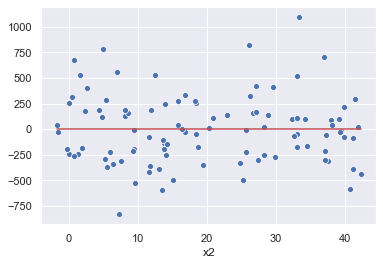

In [16]:
x2 = data.drop(['y','x1','x3'], axis=1)
sns.scatterplot(x2['x2'],dy)

m2 = LinearRegression()
m2.fit(x2, dy)

minimax2 = np.array([x2.min(), x2.max()])
plt.plot(minimax2, m2.predict(minimax2.reshape(-1, 1)), 'r-')
plt.show()

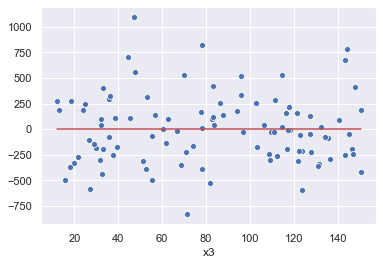

In [17]:
x3 = data.drop(['y','x1','x2'], axis=1)
sns.scatterplot(x3['x3'],dy)

m3 = LinearRegression()
m3.fit(x3, dy)

minimax3 = np.array([x3.min(), x3.max()])
plt.plot(minimax3, m3.predict(minimax3.reshape(-1, 1)), 'r-')
plt.show()

**Проверка отсутствия линейной зависимости между всеми предикторами и остатками критерием Спирмана**

In [18]:
def t_len(a):
    t = []
    tie = False
    k = 0
    
    for i in range(len(a)-1):
        if a[i] == a[i+1]:
            if tie:
                t[k - 1] += 1
            else:
                tie = True
                k += 1
                t.append(2)
        else:
            tie = False
    return t

In [19]:
def r_spearman(x, y):
    rx = stats.rankdata(x)
    ry = stats.rankdata(y)
    xs = np.sort(x)
    ys = np.sort(y)

    # размеры связок
    tx = t_len(xs)
    ty = t_len(ys)
    # количество связок
    q = len(tx)
    g = len(ty)

    u1 = 0
    for i in range(q):
        u1 += tx[i]**3 - tx[i]
    u1 *= 1/12

    u2 = 0
    for i in range(g):
        u2 += ty[i]**3 - ty[i]
    u2 *= 1/12

    r = 0
    for i in range(N):
        r += (rx[i] - ry[i])**2
    r /= (1/6 * (N**3 - N) - u1 - u2)
    r = 1 - r

    return r

In [20]:
def t_znach_r(r, n):
    T = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)
    p = 2 * min((1 - stats.t.cdf(T, n - 2)), stats.t.cdf(T, n - 2)) 
    return p

In [21]:
r1 = r_spearman(x1, dy)
p1 = t_znach_r(r1, N)
print('1: ',(r1, p1))

1:  (0.013681368136813643, 0.8925328877234548)


In [22]:
# проверка
stats.spearmanr(x1, dy)

SpearmanrResult(correlation=0.013681368136813678, pvalue=0.8925328877234546)

p-значение>0.05 => принимаем H0, x1 и остатки не коррелированы 

In [23]:
r2 = r_spearman(x2, dy)
p2 = t_znach_r(r2, N)
print('2: ',(r2, p2))

2:  (-0.024098409840983992, 0.8118897166184158)


In [24]:
# проверка
stats.spearmanr(x2, dy)

SpearmanrResult(correlation=-0.024098409840984093, pvalue=0.811889716618415)

p-значение>0.05 => принимаем H0, x2 и остатки не коррелированы

In [25]:
r3 = r_spearman(x3, dy)
p3 = t_znach_r(r3, N)
print('3: ',(r3, p3))

3:  (-0.018265826582658296, 0.8568567418493008)


In [26]:
# проверка
stats.spearmanr(x3, dy)

SpearmanrResult(correlation=-0.018265826582658264, pvalue=0.856856741849301)

p-значение>0.05 => принимаем H0, x3 и остатки не коррелированы

**Проверка отсутствия линейной зависимости между эмпирическими значениями целевой переменной и остатками**

In [27]:
r = r_spearman(y_emp, dy)
p = t_znach_r(r, N)
print((r, p))

(-0.02588658865886595, 0.7982179116948944)


In [28]:
# проверка
stats.spearmanr(y_emp, dy)

SpearmanrResult(correlation=-0.02588658865886588, pvalue=0.798217911694895)

p-значение>0.05 => принимаем H0, mp и остатки не коррелированы

**Коэффициент детерминации**

In [29]:
s = sum(dy**2)
z = sum((y - y.mean())**2)
R2 = 1 - s / z
R2
print(R2)

0.8315024444304584


In [30]:
#проверка
m.score(X, y)

0.8315024444304584

**Несмещенный коэффициент детерминации модели**

In [31]:
R2_nesm = 1 - (N - 1) / (N - 4) * s / z
R2_nesm

0.8262368958189102